<a href="https://colab.research.google.com/github/Ferorti/escuela2021/blob/main/Clase_XX_expresiones_regulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué son las Expresiones regulares?

Las expresiones regulares son patrones utilizados para encontrar una determinada combinación de caracteres dentro de una cadena de texto proporcionando una manera muy flexible de hacer la búsqueda y reconocer cadenas de texto.

Ejemplo clásico es que estamos leyendo un PDF y buscamos una palabra que lleva acento con y si él y se obtinen los mismos resultados. (cámara y camara) 

# Expresiones regulares en Python

En python la clase que se utiliza para buscar expresiones regulares en textos es ***re*** y para ello se utilizan las siguientes líneas de código:

In [1]:
# importar la biblioteca
import re
# compilar la expresión regular, es el texto que se pasa como parámetro a la función compile
rege1 = re.compile('aaa')
#texto donde deseo hacer la búsqueda
texto = 'aaatttaaatttcccgggAAATTTCCCDDD'
# buscar las coincidencias en un texto que se pasa como parámetro a la función search
#el objeto match tiene el patrón, la cadena y la posición de inicio - fin de la coincidencia
match = rege1.search(texto)
# imprimir las coincidencias
print(match.group())

aaa


# Usos de la biblioteca ***re***

Buscar en que posición está una coincidencia

In [2]:
print('Encontrada "{}"\nen "{}"\ninicio {} fin {} ("{}")'.format(
    match.re.pattern, match.string, match.start(), match.end(), texto[match.start():match.end()]))

Encontrada "aaa"
en "aaatttaaatttcccgggAAATTTCCCDDD"
inicio 0 fin 3 ("aaa")


Acotar la búsqueda

In [3]:
# match2 = rege1.search(texto, 4)

match2 = rege1.search(texto, 4, 25)
if match2 != None:
  print('Encontrada "{}"\nen "{}"\ninicio {} fin {} ("{}")'.format(
    match2.re.pattern, match2.string, match2.start(), match2.end(), texto[match2.start():match2.end()]))

Encontrada "aaa"
en "aaatttaaatttcccgggAAATTTCCCDDD"
inicio 6 fin 9 ("aaa")


In [4]:
match3 = rege1.search(texto, 15, 30)
if match3 != None:
  print('Encontrada "{}"\nen "{}"\ninicio {} fin {} ("{}")'.format(
    match3.re.pattern, match3.string, match3.start(), match3.end(), texto[match3.start():match3.end()]))
else:
  print('No encontrada')  

No encontrada


No diferenciar entre mayúsculas y minúsculas

In [5]:
rege2 = re.compile('aaa', re.IGNORECASE)

match4 = rege2.search(texto, 15, 30)
if match4 != None:
  print('Encontrada "{}"\nen "{}"\ninicio {} fin {} ("{}")'.format(
    match4.re.pattern, match4.string, match4.start(), match4.end(), texto[match4.start():match4.end()]))
else:
  print('No encontrada')  


Encontrada "aaa"
en "aaatttaaatttcccgggAAATTTCCCDDD"
inicio 18 fin 21 ("AAA")


buscar todas las coincidencias en el texto

In [6]:
match5 = rege2.findall(texto)
print(match5)

['aaa', 'aaa', 'AAA']


Dividir texto con una expresion regular

In [7]:
match6 = rege2.split(texto)
print(texto)
print(match6)

aaatttaaatttcccgggAAATTTCCCDDD
['', 'ttt', 'tttcccggg', 'TTTCCCDDD']


Subtituir texto con expresion regular

In [8]:
# match7 = rege2.sub('---', texto) #todas las sustituciones
# match7 = rege2.sub('---', texto, 0) #todas las sustituciones
# match7 = rege2.sub('---', texto, 1) #solo la primera se sustituye
# match7 = rege2.sub('---', texto, 2) #solo la primera y la segunda se sustituyen

match7 = rege2.sub('---', texto)
print(texto)
print(match7)

aaatttaaatttcccgggAAATTTCCCDDD
---ttt---tttcccggg---TTTCCCDDD


# Caracteres Especiales

Utilizaré la siguiente función para imprimir las coincidencias y textos


In [9]:
def imprimir_coincidencias(reg, lista):
  exp_coincidencia = []
  texto_coincidencia = []
  for texto in lista:  
    match = reg.search(texto)
    if match:
      exp_coincidencia.append(match.group())
      texto_coincidencia.append(texto)
  print(lista)
  print(texto_coincidencia)  
  print(exp_coincidencia)

"."  Cualquier caracter excepto el fin de linea

In [10]:
a = ["ACT", "ACTG", "ACTGAT", "GGAATT", "ATGATG", "ATACTAGG"]
reg1 = re.compile("ACT.")

imprimir_coincidencias(reg1, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTG', 'ACTGAT', 'ATACTAGG']
['ACTG', 'ACTG', 'ACTA']


"^" Inicio de línea

In [11]:
reg2 = re.compile("^ACT.")
imprimir_coincidencias(reg2, a)


['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTG', 'ACTGAT']
['ACTG', 'ACTG']


"$" Fin de línea

In [12]:
reg3 = re.compile("^ACT.$")
imprimir_coincidencias(reg3, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTG']
['ACTG']


"*" La expresion que se antepone se repite 0 o más veces

In [13]:
reg4 = re.compile("ACT.*")
imprimir_coincidencias(reg4, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACT', 'ACTG', 'ACTGAT', 'ATACTAGG']
['ACT', 'ACTG', 'ACTGAT', 'ACTAGG']


"+" La expresión que se antepone se repite 1 o más veces

In [14]:
reg5 = re.compile("ACT.+")
imprimir_coincidencias(reg5, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTG', 'ACTGAT', 'ATACTAGG']
['ACTG', 'ACTGAT', 'ACTAGG']


"?" la expresión que se antepone se repite 0 o 1 vez

In [15]:
reg6 = re.compile("ACT.?")
imprimir_coincidencias(reg6, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACT', 'ACTG', 'ACTGAT', 'ATACTAGG']
['ACT', 'ACTG', 'ACTG', 'ACTA']


"{n}" La expresión que se antepone coincida n veces.

"{n,m}" La expresión que se antepone coincida como mínimo n veces y como máximo m veces.

"{,m}" La expresión que se antepone coincida como mínimo 0 veces y como máximo m veces.

"{n,}" La expresión que se antepone coincida como mínimo n veces y como máximo todas las posibles.

In [16]:
reg7 = re.compile("ACT.{2}")
imprimir_coincidencias(reg7, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTGAT', 'ATACTAGG']
['ACTGA', 'ACTAG']


In [17]:
reg8 = re.compile("ACT.{2,5}")
imprimir_coincidencias(reg8, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTGAT', 'ATACTAGG']
['ACTGAT', 'ACTAGG']


"\\" Caracter de escape

Se utiliza cuando queremos incluir en nuestra expresión alguno de los caracteres especiales, por ejemplo para buscar el caracter:
 
*   "." tenemos que escribir "\\."
*   "\\" tenemos que escribir "\\\\"
*   "(" tenemos que escribir "\("
*   tabulación tenemos que escribir "\\t"
*   fin de línea tenemos que escribir "\\n"





In [18]:
texto2 = '3.14'
y = re.search('.', texto2)
print('Patrón "{}" en "{}" inicio {} fin {} coincidencia "{}"'.format(
    y.re.pattern, y.string, y.start(), y.end(), y.group(), y.group()))

z = re.search('\.', texto2)
print('Patrón "{}" en "{}" inicio {} fin {} coincidencia "{}"'.format(
    z.re.pattern, z.string, z.start(), z.end(), z.group()))

Patrón "." en "3.14" inicio 0 fin 1 coincidencia "3"
Patrón "\." en "3.14" inicio 1 fin 2 coincidencia "."


"[...]" Descripción de conjuntos

In [19]:
reg9 = re.compile("A[CT]T")
imprimir_coincidencias(reg9, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATACTAGG']
['ACT', 'ACT', 'ACT', 'ATT', 'ACT']


Algunos ejemplos de conjuntos son:


*   [actg] las 4 posibles letras para nucleótidos
*   [actgACTG] las 4 posibles letras para nucleótidos en minúscula o mayúscula
*   [a-zA-Z] las letras del abecedario, mayúsculas y minúsculas
*   [0-9] los números decimales
*   [^0-9] cualquier caracter que no sean los números decimales












Algunos conjuntos predefinidos en python. Se pueden utilizar haciendo uso del caracter de escape:

*   \d coincide con [0-9]
*   \D coincide con [^0-9]
*   \w coincide con [a-zA-Z0-9]
*   \W coincide con [^a-zA-Z0-9_]
*   \s coincide con [ \t\n\r\f\v]
*   \S coincide con [^ \t\n\r\f\v]





"(...)" grupos de expresiones

In [20]:
#ejemplo de grupo
reg10 = re.compile("([atg]{3}){2,5}", re.IGNORECASE)
imprimir_coincidencias(reg10, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['GGAATT', 'ATGATG']
['GGAATT', 'ATGATG']


In [21]:
#ejemplo de obtener solo un grupo
reg11 = re.compile("[at]{3}(.{2,5})a", re.IGNORECASE)
exp_group1 = []
texto_coincidencia = []
for texto in a:  
  match = reg11.search(texto)
  if match:
    exp_group1.append(match.group(1))
    texto_coincidencia.append(texto)
print(a)
print(texto_coincidencia)
print(exp_group1)  

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ATACTAGG']
['CT']


In [26]:
#subtitutir con el grupo
reg12 = re.compile("[at]{3}(.{2,5})a", re.IGNORECASE)
new_list = []
for texto in a:  
  match = reg12.sub("---\\1-", texto)
  new_list.append(match) 
print(a)  
print(new_list)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', '---CT-GG']


In [27]:
#subtitutir cambiando el orden de los grupos
reg13 = re.compile("([at]{3})(.{2,3})(.*)", re.IGNORECASE)
new_list2 = []
for texto in a:  
  match = reg13.sub("\\2---\\1---\\3", texto)
  new_list2.append(match) 
print(a)  
print(new_list2)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'CTA---ATA---GG']


"|" hay coincidencias si está la expresión anterior o la siguiente

In [24]:
reg14 = re.compile("(ACTG)|(GAT)")
imprimir_coincidencias(reg14, a)

['ACT', 'ACTG', 'ACTGAT', 'GGAATT', 'ATGATG', 'ATACTAGG']
['ACTG', 'ACTGAT', 'ATGATG']
['ACTG', 'ACTG', 'GAT']


# Ejemplo de expresiones regulares en bioinformática, ejemplo de SLIMs

SLIMs, del inglés short lineal motifs. Son las siglas utilizadas para catalogar patrones cortos que ocurren en las secuencias de proteínas. Se describen mediante espresiones regulares. Pues estos motivos lineales pueden describir una función.

[ELM](http://elm.eu.org/) es un servidor web de SLIMs en eucariotas para sitios funcionales de proteínas.

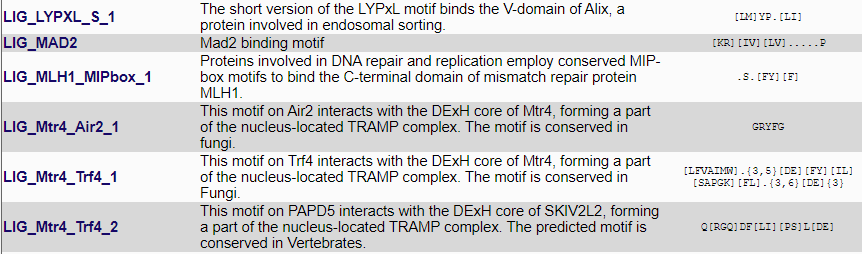